In [1]:
import pandas as pd
from sqlalchemy import create_engine
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import requests

In [2]:
#read in csv files
file = "states_all.csv"
file2= "diversityindex.csv"
states_df = pd.read_csv(file)
diversity_df = pd.read_csv(file2)
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [3]:
states_df['id']=states_df.index
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,id
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,1
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,4


In [4]:
states_scores_df=states_df[['id', 'STATE', 'YEAR', 'TOTAL_REVENUE', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE','AVG_READING_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_8_SCORE']].copy()
states_scores_df.head()

,id,STATE,YEAR,TOTAL_REVENUE,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
0,0,ALABAMA,1992,2678885.0,731634.0,208.0,207.0,252.0,NaN
1,1,ALASKA,1992,1049591.0,122487.0,NaN,NaN,NaN,NaN
2,2,ARIZONA,1992,3258079.0,673477.0,215.0,209.0,265.0,NaN
3,3,ARKANSAS,1992,1711959.0,441490.0,210.0,211.0,256.0,NaN
4,4,CALIFORNIA,1992,26260025.0,5254844.0,208.0,202.0,261.0,NaN


In [5]:
states_scores_clean=states_scores_df.dropna()
states_scores_clean.head()

,id,STATE,YEAR,TOTAL_REVENUE,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
561,561,ALABAMA,2003,5196054.0,731220.0,223.0,207.0,262.0,253.0
562,562,ALASKA,2003,1425948.0,133933.0,233.0,212.0,279.0,256.0
563,563,ARIZONA,2003,6529894.0,1012068.0,229.0,209.0,271.0,255.0
564,564,ARKANSAS,2003,3241275.0,454523.0,229.0,214.0,266.0,258.0
565,565,CALIFORNIA,2003,59815855.0,6413867.0,227.0,206.0,267.0,251.0


In [6]:
states_scores_clean.columns= states_scores_df.columns.str.lower()
states_scores_clean.head()

,id,state,year,total_revenue,grades_all_g,avg_math_4_score,avg_reading_4_score,avg_math_8_score,avg_reading_8_score
561,561,ALABAMA,2003,5196054.0,731220.0,223.0,207.0,262.0,253.0
562,562,ALASKA,2003,1425948.0,133933.0,233.0,212.0,279.0,256.0
563,563,ARIZONA,2003,6529894.0,1012068.0,229.0,209.0,271.0,255.0
564,564,ARKANSAS,2003,3241275.0,454523.0,229.0,214.0,266.0,258.0
565,565,CALIFORNIA,2003,59815855.0,6413867.0,227.0,206.0,267.0,251.0


In [7]:

states_scores_clean['rev_per_student']=(states_scores_clean['total_revenue']/states_scores_clean['grades_all_g'])



/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
#set up the connection to postgres/SQL
rds_connection_string = "postgres:postgres@localhost:5432/Project-13_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [9]:
engine.table_names()

['states_all', 'diversity']

In [10]:
#load dataframe into SQL
states_scores_clean.to_sql(name='states_all', con=engine, if_exists='append', index=False)

In [11]:
#show all california entries ordered by date
query = f"""
    SELECT * FROM states_all
    WHERE state = 'CALIFORNIA'
    ORDER BY year DESC
"""

In [12]:
#write data out from SQL to dataframe
california = pd.read_sql_query(query, con=engine).head(100)

In [13]:
california.head()

,id,state,year,total_revenue,grades_all_g,avg_math_4_score,avg_reading_4_score,avg_math_8_score,avg_reading_8_score,rev_per_student
0,1177,CALIFORNIA,2015,78248042.0,6226737.0,232.0,213.0,275.0,259.0,12.566460
1,1177,CALIFORNIA,2015,78248042.0,6226737.0,232.0,213.0,275.0,259.0,12.566460
2,1177,CALIFORNIA,2015,78248042.0,6226737.0,232.0,213.0,275.0,259.0,12.566460
3,1177,CALIFORNIA,2015,78248042.0,6226737.0,232.0,213.0,275.0,259.0,12.566460
4,1075,CALIFORNIA,2013,68868516.0,6312623.0,234.0,213.0,276.0,262.0,10.909651


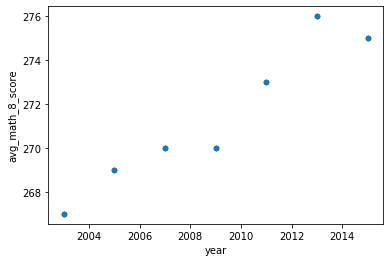

In [14]:
#plotting average math scores in california across year
california.plot.scatter(x='year', y='avg_math_8_score')

In [15]:
#querying math scores in all states
query=f"""
    select year, avg_math_4_score, avg_math_8_score 
    from states_all
    
    """    

In [16]:
scores_year = pd.read_sql_query(query, con=engine)

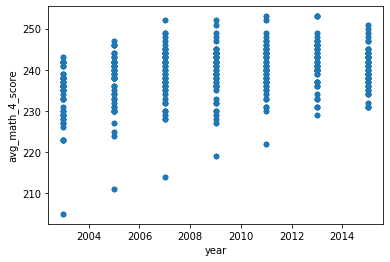

In [17]:
scores_year.plot.scatter(x='year', y='avg_math_4_score')

In [18]:
#write the other csv file containing diversity information into another dataframe
file2= "diversityindex.csv"
diversity_df = pd.read_csv(file2)
diversity_df.head(50)

,Location,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013"
0,"Aleutians West Census Area, AK",0.769346,7.4,13.8,31.1,2.3,4.8,14.6,29.2
1,"Queens County, NY",0.742224,20.9,1.3,25.2,0.2,2.7,28.0,26.7
2,"Maui County, HI",0.740757,0.8,0.6,28.8,10.6,23.3,10.7,31.5
3,"Alameda County, CA",0.740399,12.4,1.2,28.2,1.0,5.2,22.7,33.2
4,"Aleutians East Borough, AK",0.738867,7.7,21.8,41.4,0.7,3.7,13.5,12.9
5,"Hawaii County, HI",0.738772,0.8,0.6,22.1,12.7,29.5,12.2,30.7
6,"Fort Bend County, TX",0.736427,21.2,0.6,18.4,0.1,2.0,24.0,35.6
7,HAWAII,0.731461,2.3,0.4,37.7,10.0,23.1,9.8,23.0
8,"Kauai County, HI",0.730326,0.7,0.5,31.3,9.1,24.6,10.5,30.3
9,"Solano County, CA",0.725821,14.9,1.3,15.4,1.0,6.7,25.2,40.0


In [19]:
diversity_index=diversity_df[['Location','Diversity-Index']]
diversity_index1 = diversity_index.rename(columns={"Location": "loca", "Diversity-Index": "divindex"})
diversity_index1.head()

,loca,divindex
0,"Aleutians West Census Area, AK",0.769346
1,"Queens County, NY",0.742224
2,"Maui County, HI",0.740757
3,"Alameda County, CA",0.740399
4,"Aleutians East Borough, AK",0.738867


In [20]:
diversity_state_df = diversity_index1[~diversity_index1["loca"].str.contains(',')]
diversity_state_df.head()

,loca,divindex
7,HAWAII,0.731461
32,CALIFORNIA,0.674524
57,TEXAS,0.641294
62,NEVADA,0.635404
84,DISTRICT OF COLUMBIA,0.614376


In [21]:
#Write the diversity data into SQL
diversity_state_df.to_sql(name='diversity', con=engine, if_exists='append', index=False)

In [22]:
query=f"""
    select diversity.loca, diversity.divindex, states_all.avg_math_8_score, states_all.avg_math_4_score
    from diversity
    inner join states_all on diversity.loca=states_all.state
    where states_all.year=2015
    order by states_all.avg_math_8_score desc
    """

In [23]:
diversity_score = pd.read_sql_query(query, con=engine)

In [24]:
diversity_score1=diversity_score.drop_duplicates()
diversity_score1.head()

,loca,divindex,avg_math_8_score,avg_math_4_score
0,MASSACHUSETTS,0.414346,297.0,251.0
16,MINNESOTA,0.320766,294.0,250.0
32,VERMONT,0.119187,290.0,243.0
48,WISCONSIN,0.310146,289.0,243.0
64,VIRGINIA,0.544823,288.0,247.0


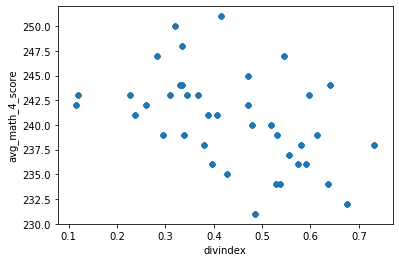

In [25]:
#plotting diversity index against average math score of 4th grade to see the correlation between diversity and performance
diversity_score.plot.scatter(x='divindex', y='avg_math_4_score')

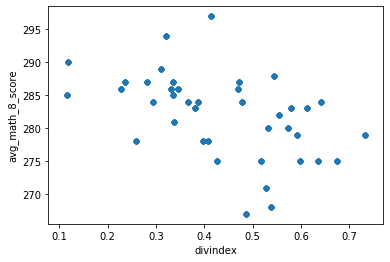

In [26]:
#plotting diversity index against average math score of 8th grade to see the correlation between diversity and performance
diversity_score.plot.scatter(x='divindex', y='avg_math_8_score')
# a seemingly negative trend/at least not positive

In [27]:
query=f"""
    select diversity.loca, diversity.divindex, states_all.rev_per_student
    from diversity
    inner join states_all on diversity.loca=states_all.state
    where states_all.year=2015
    order by states_all.rev_per_student asc
    """

In [28]:
diversity_revenue = pd.read_sql_query(query, con=engine)
diversity_revenue1=diversity_revenue.drop_duplicates()


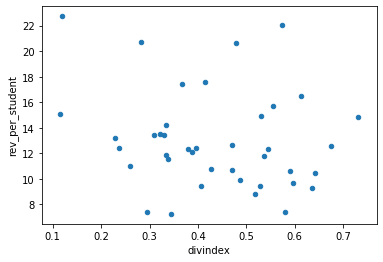

In [29]:
#plotting diversity versus revenue
diversity_revenue1.plot.scatter(x='divindex', y='rev_per_student')

In [30]:
#states with the lowest revenue per student
diversity_revenue1.head()

,loca,divindex,rev_per_student
0,UTAH,0.345283,7.262389
16,IDAHO,0.294478,7.417508
32,ARIZONA,0.580068,7.421290
48,OKLAHOMA,0.517362,8.834438
64,NEVADA,0.635404,9.294477


In [31]:
#writing states, diversity index, and revenue per student into a new dataframe
#states with highest revenue per student
query=f"""
    select diversity.loca, diversity.divindex, states_all.rev_per_student
    from diversity
    inner join states_all on diversity.loca=states_all.state
    where states_all.year=2015
    order by states_all.rev_per_student desc
    """
diversity_revenue = pd.read_sql_query(query, con=engine)
diversity_revenue1=diversity_revenue.drop_duplicates()
diversity_revenue1.head()

,loca,divindex,rev_per_student
0,VERMONT,0.119187,22.725457
16,ALASKA,0.573340,22.049005
32,WYOMING,0.281902,20.723566
48,CONNECTICUT,0.478890,20.634237
64,MASSACHUSETTS,0.414346,17.619011


In [32]:
#the rev_per_student could be skewed because of different costs of living in different states; we should "normalize the rev_per_student based on the cost of living. Scraping cost of living data 
url="https://worldpopulationreview.com/state-rankings/cost-of-living-index-by-state"

In [33]:
!pip3 install lxml

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [34]:
#read in cost of living data into a table
tables = pd.read_html(url)
tables

[             State  Cost Index  Cost Rank  Grocery  Housing  Utilities  \
 0      Mississippi        86.1          1     91.6     70.1       89.1   
 1         Arkansas        86.9          2     92.0     73.9       91.8   
 2         Oklahoma        87.0          3     95.4     71.9       94.1   
 3         Missouri        87.1          4     96.6     70.6       99.6   
 4       New Mexico        87.5          5    100.9     77.7       87.9   
 5        Tennessee        88.7          6     93.3     80.2       93.4   
 6         Michigan        88.9          7     89.3     75.2       97.3   
 7           Kansas        89.0          8     91.9     73.8      103.0   
 8          Georgia        89.2          9     96.9     73.8       92.4   
 9          Wyoming        89.3         10     98.7     72.3       87.3   
 10         Alabama        89.3         11     97.4     71.5      103.3   
 11         Indiana        90.0         12     93.3     77.3       97.0   
 12            Iowa      

In [35]:
cost_of_liv=tables[0]
cost_of_liv.head()

,State,Cost Index,Cost Rank,Grocery,Housing,Utilities,Transportation,Misc
0,Mississippi,86.1,1,91.6,70.1,89.1,89.2,91.4
1,Arkansas,86.9,2,92.0,73.9,91.8,83.6,85.6
2,Oklahoma,87.0,3,95.4,71.9,94.1,89.5,93.2
3,Missouri,87.1,4,96.6,70.6,99.6,87.3,95.7
4,New Mexico,87.5,5,100.9,77.7,87.9,91.6,100.1


In [36]:
cost_of_liv1=cost_of_liv.rename(columns={'State':'state', 'Cost Index':"cost_indx"})
state_cost=cost_of_liv1[['state', 'cost_indx']]
state_cost.head()
            

,state,cost_indx
0,Mississippi,86.1
1,Arkansas,86.9
2,Oklahoma,87.0
3,Missouri,87.1
4,New Mexico,87.5


In [37]:
state_cost['state'] = state_cost['state'].str.upper() 
state_cost.head()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,state,cost_indx
0,MISSISSIPPI,86.1
1,ARKANSAS,86.9
2,OKLAHOMA,87.0
3,MISSOURI,87.1
4,NEW MEXICO,87.5


In [38]:
state_cost.to_sql(name='cost_of_living', con=engine, if_exists='append', index=False)

In [39]:
query=f"""
        select states_all.state, states_all.rev_per_student, cost_of_living.cost_indx, states_all.avg_math_4_score
        from states_all
        inner join cost_of_living on cost_of_living.state = states_all.state
        where states_all.year = 2015
        """

In [40]:
revenue_living = pd.read_sql_query(query, con=engine)
revenue_living.head()

,state,rev_per_student,cost_indx,avg_math_4_score
0,ALABAMA,9.895578,89.3,231.0
1,ALASKA,22.049005,129.9,236.0
2,ARIZONA,7.421290,97.0,238.0
3,ARKANSAS,10.786994,86.9,235.0
4,CALIFORNIA,12.566460,151.7,232.0


In [41]:
rev_per_student_cost = revenue_living['rev_per_student']/revenue_living['cost_indx']
score = revenue_living['avg_math_4_score']

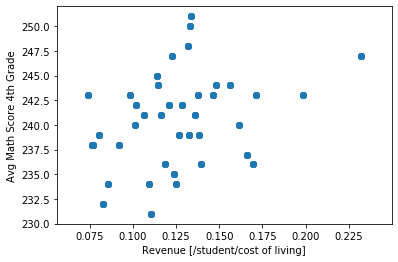

In [42]:
#plotting adjusted revenue per student versus average math score 
plt.scatter(rev_per_student_cost, score)
plt.xlabel('Revenue [/student/cost of living]')
plt.ylabel('Avg Math Score 4th Grade')
plt.show()
#looks like there is a postitive correlation, which supports that investment into education does lead to better study performance.